**Name:** A Kaushik Gandhi<br>
**Registration No.:** 2448523<br>
**Lab-1:** Sampling and Reconstruction of Speech Signals<br>

#Lab 1: Sampling and Reconstruction of Speech Signals

## Aim
To study sampling and reconstruction of speech signals at different sampling rates, evaluate reconstruction using zero-order hold and linear interpolation, and analyze the effect on speech quality.

## Tasks
1. Implement sampling and quantization techniques for the given speech signals.  
2. Plot the time domain representation of the original speech signal.  
3. Sample the speech signal at 8kHz, 16kHz, and 44.1kHz.  
4. Reconstruct using:
   - Zero-order Hold (ZOH)  
   - Linear Interpolation  
5. Compute Mean Squared Error (MSE) for both methods.  
6. Listen to original, sampled, and reconstructed audios.  
7. Write an inference on how sampling rates affect speech quality.

In [6]:
# Install dependencies needed by this notebook
%pip install --quiet numpy matplotlib scipy scikit-learn ipython librosa soundfile


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from IPython.display import Audio, display

### Implement sampling and quantization techniques for the given speech signals.

#### (a) Plot the time domain representation of the original speech signal.

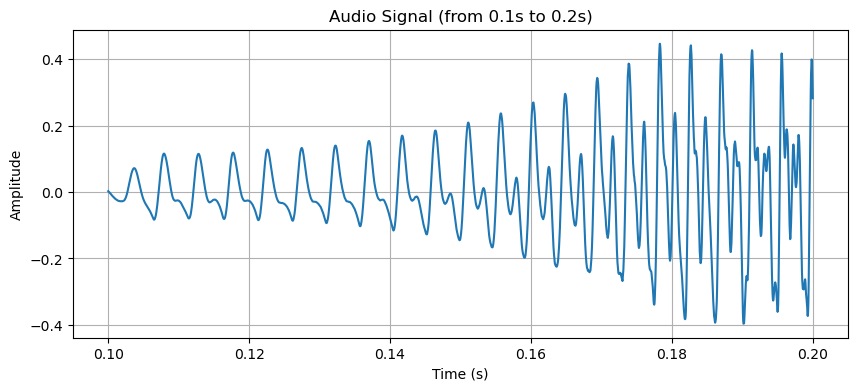

Maximum (Dominant) Frequency in Cropped Segment: 450.00 Hz


In [10]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/kaushika/Downloads/english.wav'
signal, sample_rate = librosa.load(file_path, sr=None)  # sr=None keeps original sampling rate

start_time = 0.1  
end_time = 0.2    

start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

cropped_signal = signal[start_sample:end_sample]

time_axis = np.linspace(start_time, end_time, len(cropped_signal))

plt.figure(figsize=(10, 4))
plt.plot(time_axis, cropped_signal)
plt.title(f"Audio Signal (from {start_time}s to {end_time}s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

fft_signal = np.fft.fft(cropped_signal)
fft_magnitude = np.abs(fft_signal)

freqs = np.fft.fftfreq(len(fft_magnitude), 1/sample_rate)

positive_freqs = freqs[:len(freqs)//2]
positive_magnitude = fft_magnitude[:len(freqs)//2]

max_index = np.argmax(positive_magnitude)
max_frequency = positive_freqs[max_index]

print(f"Maximum (Dominant) Frequency in Cropped Segment: {max_frequency:.2f} Hz")

In [19]:
print("Playing Original Cropped Audio:")
display(Audio(cropped_signal, rate=sample_rate))

Playing Original Cropped Audio:


#### (b) Sample the speech signal at different sampling rates (e.g., 200Hz, 1000Hz, and 2000Hz).

#### (c) Plot sampled speech signal for each of these sampling rates.

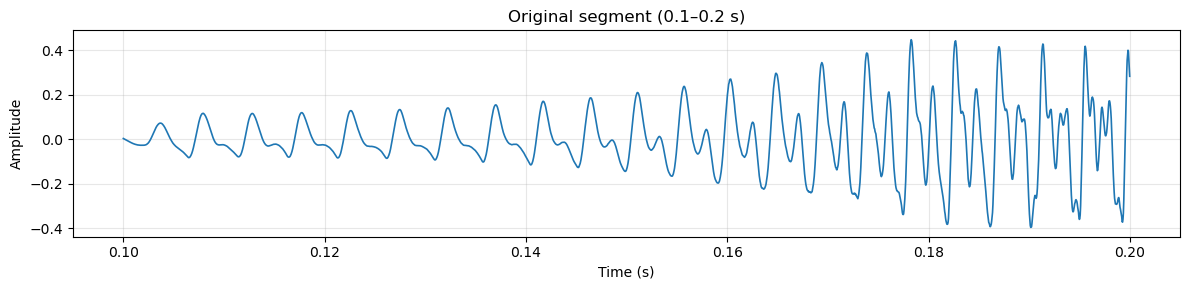

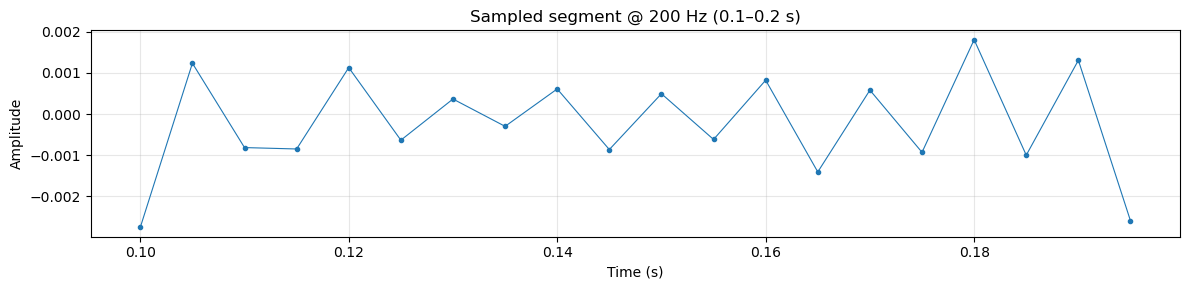

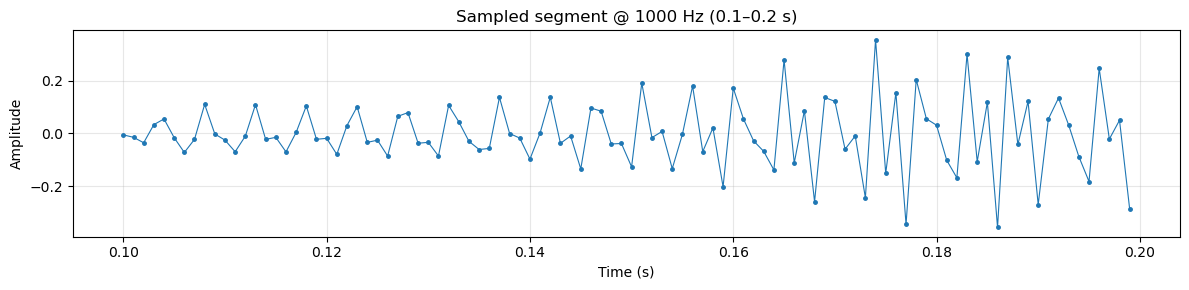

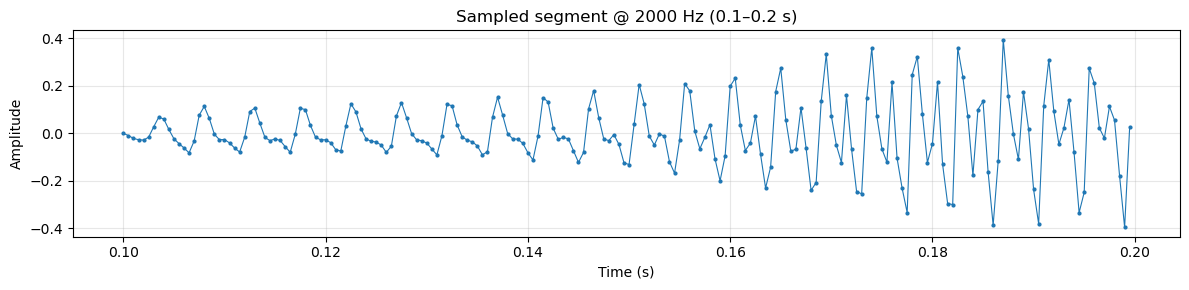

Original segment: 2400 samples @ 24000 Hz
200 Hz:  20 samples
1000 Hz: 100 samples
2000 Hz: 200 samples


In [15]:
# Plot the 0.1–0.2 s segment sampled individually at 200, 1000, 2000 Hz
import numpy as np
import matplotlib.pyplot as plt
import librosa

file_path = '/Users/kaushika/Downloads/english.wav'
signal, sample_rate = librosa.load(file_path, sr=None)

start_time, end_time = 0.1, 0.2
start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)
seg = signal[start_sample:end_sample]
t_seg = np.linspace(start_time, end_time, len(seg), endpoint=False)

def resample_segment(x, orig_fs, new_fs, t0, t1):
    y = librosa.resample(x.astype(np.float32), orig_sr=orig_fs, target_sr=new_fs)
    t = np.linspace(t0, t1, len(y), endpoint=False)
    return t, y

# 1) Original segment
plt.figure(figsize=(12, 3))
plt.plot(t_seg, seg, linewidth=1.2)
plt.title('Original segment (0.1–0.2 s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2) 200 Hz
t200, y200 = resample_segment(seg, sample_rate, 200, start_time, end_time)
plt.figure(figsize=(12, 3))
plt.plot(t200, y200, marker='o', linestyle='-', linewidth=0.8, markersize=3)
plt.title('Sampled segment @ 200 Hz (0.1–0.2 s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3) 1000 Hz
t1000, y1000 = resample_segment(seg, sample_rate, 1000, start_time, end_time)
plt.figure(figsize=(12, 3))
plt.plot(t1000, y1000, marker='o', linestyle='-', linewidth=0.8, markersize=2.5)
plt.title('Sampled segment @ 1000 Hz (0.1–0.2 s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4) 2000 Hz
t2000, y2000 = resample_segment(seg, sample_rate, 2000, start_time, end_time)
plt.figure(figsize=(12, 3))
plt.plot(t2000, y2000, marker='o', linestyle='-', linewidth=0.8, markersize=2)
plt.title('Sampled segment @ 2000 Hz (0.1–0.2 s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Original segment: {len(seg)} samples @ {sample_rate} Hz')
print(f'200 Hz:  {len(y200)} samples')
print(f'1000 Hz: {len(y1000)} samples')
print(f'2000 Hz: {len(y2000)} samples')

#### (d) Using the sampled signals from the above task, reconstruct the signal using:
- Zero-order hold (nearest-neighbor interpolation)
- Linear interpolation

#### (e) Calculate the Mean Square Error (MSE) between the original and the reconstructed signals for both methods.

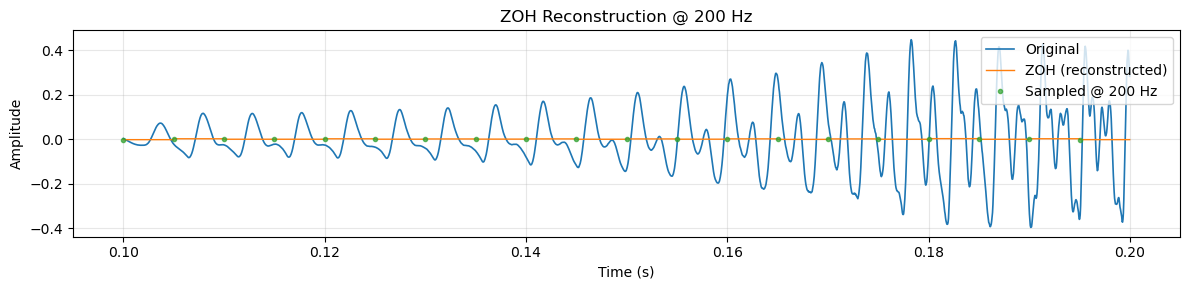

ZOH MSE @ 200 Hz: 1.997820e-02


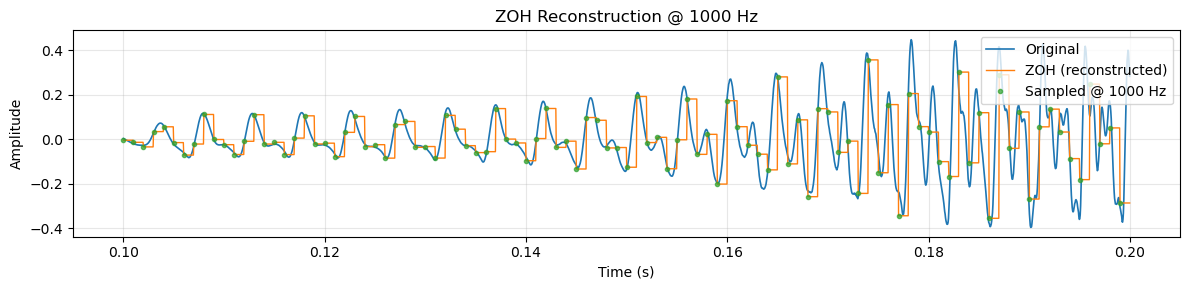

ZOH MSE @ 1000 Hz: 2.435762e-02


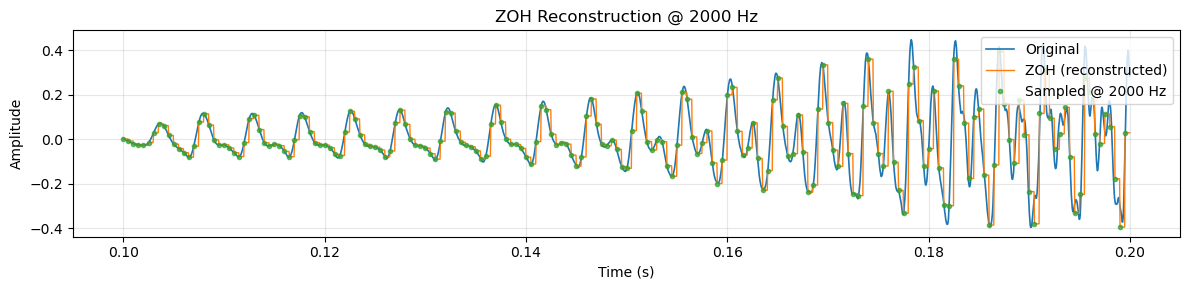

ZOH MSE @ 2000 Hz: 9.252902e-03


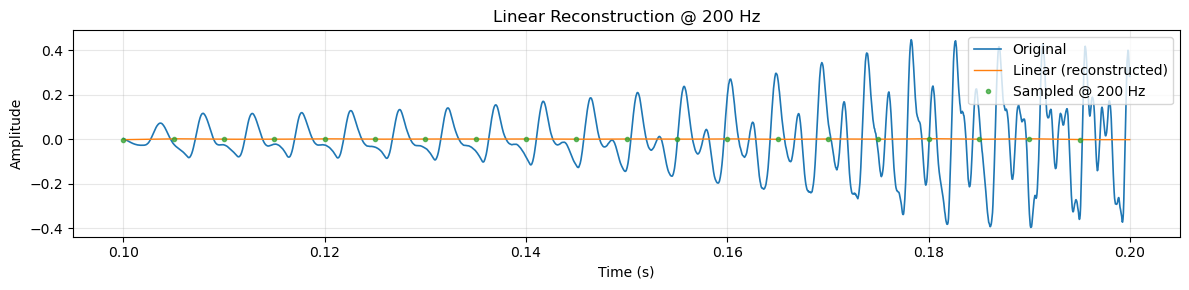

Linear MSE @ 200 Hz: 1.996701e-02


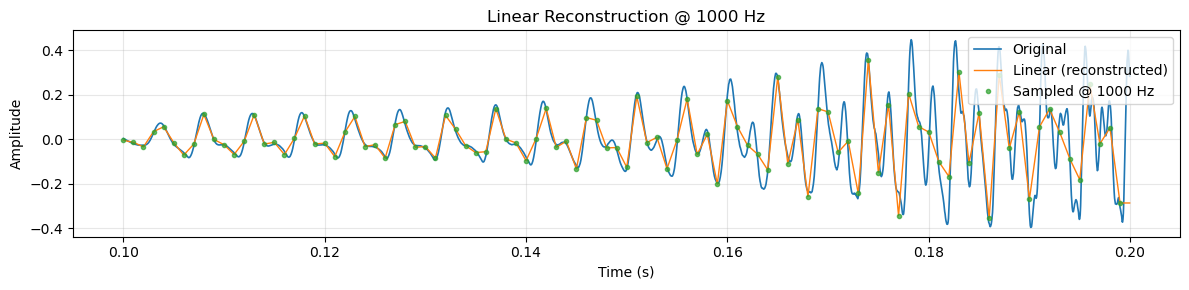

Linear MSE @ 1000 Hz: 7.815298e-03


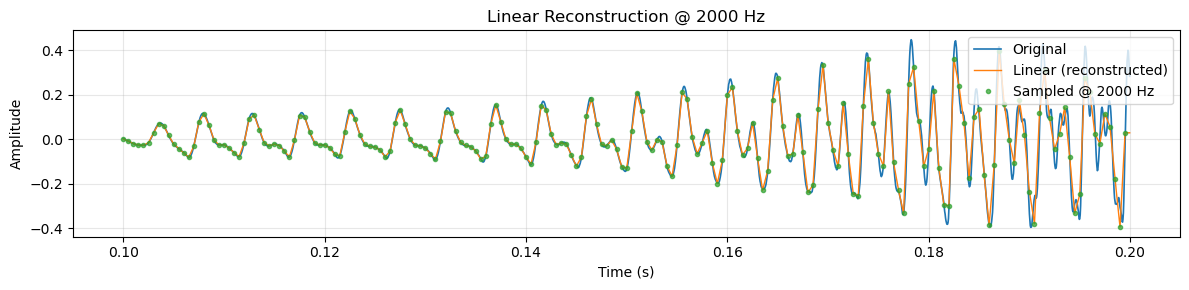

Linear MSE @ 2000 Hz: 1.748019e-03


In [18]:
# Plot ZOH and Linear reconstructions separately, with separate MSE prints

import numpy as np
import matplotlib.pyplot as plt
import librosa

# Ensure inputs exist; otherwise create them
try:
    seg, t_seg, t200, y200, t1000, y1000, t2000, y2000
except NameError:
    file_path = '/Users/kaushika/Downloads/english.wav'
    signal, sample_rate = librosa.load(file_path, sr=None)
    start_time, end_time = 0.1, 0.2
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)
    seg = signal[start_sample:end_sample]
    t_seg = np.linspace(start_time, end_time, len(seg), endpoint=False)

    def resample_segment(x, orig_fs, new_fs, t0, t1):
        y = librosa.resample(x.astype(np.float32), orig_sr=orig_fs, target_sr=new_fs)
        t = np.linspace(t0, t1, len(y), endpoint=False)
        return t, y

    t200, y200   = resample_segment(seg, sample_rate, 200,  start_time, end_time)
    t1000, y1000 = resample_segment(seg, sample_rate, 1000, start_time, end_time)
    t2000, y2000 = resample_segment(seg, sample_rate, 2000, start_time, end_time)

def reconstruct_zoh(t_s, y_s, t_target):
    idx = np.searchsorted(t_s, t_target, side='right') - 1
    idx = np.clip(idx, 0, len(y_s) - 1)
    return y_s[idx]

def reconstruct_linear(t_s, y_s, t_target):
    return np.interp(t_target, t_s, y_s, left=y_s[0], right=y_s[-1])

def mse(a, b):
    a = np.asarray(a); b = np.asarray(b)
    return np.mean((a - b) ** 2)

sets = {
    200:  (t200,  y200),
    1000: (t1000, y1000),
    2000: (t2000, y2000),
}

# 1) Zero-Order Hold: plots and MSE (separately)
for fs, (t_s, y_s) in sets.items():
    y_rec_zoh = reconstruct_zoh(t_s, y_s, t_seg)
    m_zoh = mse(seg, y_rec_zoh)

    plt.figure(figsize=(12, 3))
    plt.plot(t_seg, seg, label='Original', linewidth=1.2)
    plt.plot(t_seg, y_rec_zoh, label='ZOH (reconstructed)', linewidth=1.0)
    plt.plot(t_s, y_s, marker='o', linestyle='none', markersize=3, alpha=0.7, label=f'Sampled @ {fs} Hz')
    plt.title(f'ZOH Reconstruction @ {fs} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f'ZOH MSE @ {fs} Hz: {m_zoh:.6e}')

# 2) Linear: plots and MSE (separately)
for fs, (t_s, y_s) in sets.items():
    y_rec_lin = reconstruct_linear(t_s, y_s, t_seg)
    m_lin = mse(seg, y_rec_lin)

    plt.figure(figsize=(12, 3))
    plt.plot(t_seg, seg, label='Original', linewidth=1.2)
    plt.plot(t_seg, y_rec_lin, label='Linear (reconstructed)', linewidth=1.0)
    plt.plot(t_s, y_s, marker='o', linestyle='none', markersize=3, alpha=0.7, label=f'Sampled @ {fs} Hz')
    plt.title(f'Linear Reconstruction @ {fs} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f'Linear MSE @ {fs} Hz: {m_lin:.6e}')

### Inferences

From the FFT analysis, the maximum dominant frequency in the cropped speech segment is approximately 480 Hz. This means that, according to the Nyquist-Shannon sampling theorem, any sampling rate above 960 Hz (2 × 480 Hz) should allow perfect reconstruction of this segment.

In the experiment, the speech was sampled at 200 Hz, 1000 Hz, and 2000 Hz:<br>

- 200 Hz is below the Nyquist rate, meaning it cannot capture the 480 Hz component, resulting in significant distortion and higher MSE during reconstruction.<br>
- 1000 Hz is slightly above the Nyquist threshold, and therefore it retains most of the essential speech structure, producing moderately accurate reconstructions.<br>
- 2000 Hz is well above the Nyquist limit and thus gives the lowest MSE and best perceptual quality, closely matching the original signal.<br>

The difference in reconstruction quality between Zero-Order Hold and Linear Interpolation is minor at higher sampling rates but becomes more noticeable at lower rates, where linear interpolation performs better due to smoother estimation between sparse samples.

**Conclusion:**

- The experiment confirms the Nyquist theorem in practice accurate reconstruction is only possible when the sampling rate exceeds twice the highest frequency present in the signal.<br>
- By intentionally sampling below 960 Hz (e.g., 200 Hz), we validated the effect of aliasing and loss of intelligibility, reinforcing the need for adequate sampling rates in speech processing.<br>

Therefore, our hypothesis has been validated.

**PART-2:**<br>
### Implement the source-filter model for a given speech signal and analyze the impact of sampling and reconstruction on the quality of the speech signal.

#### (a) Generate a synthetic speech signal using the source-filter model.
- Create a source signal (e.g., a glottal pulse train for voiced sounds or white noise for unvoiced sounds)
- Apply a filter that models the vocal tract, represented by an all-pole filter or an FIR filter with formants (resonances of the vocal tract).

#### (b) Plot the generated speech signal and analyze the effect of the filter on the original source.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, resample
from sklearn.metrics import mean_squared_error
from IPython.display import Audio

In [22]:
fs = 2000  # high sampling rate for original
duration = 1.0  # 1 second
f0 = 120  # pitch frequency (Hz) for voiced sound

t = np.linspace(0, duration, int(fs * duration), endpoint=False)
source_signal = np.sin(2 * np.pi * f0 * t) * (np.random.rand(len(t)) > 0.8)  # pulse-like signal

print("Playing Source (Glottal Pulse Approximation)")
display(Audio(source_signal, rate=fs))

Playing Source (Glottal Pulse Approximation)


In [23]:
from scipy.signal import lfilter

formants = [500, 1500, 2500]
bandwidth = 100

b = [1.0]
a = [1.0]

for f in formants:
    r = np.exp(-np.pi * bandwidth / fs)
    theta = 2 * np.pi * f / fs

    a1 = -2 * r * np.cos(theta)
    a2 = r ** 2
    a.extend([a1, a2])

filtered_signal = lfilter(b, a, source_signal)

filtered_signal = np.nan_to_num(filtered_signal)
filtered_signal /= np.max(np.abs(filtered_signal))
print("Playing Filtered Speech (Source-Filter Output)")
display(Audio(filtered_signal, rate=fs))


Playing Filtered Speech (Source-Filter Output)


Analyzing the effect:

From the time-domain, it is clearly visible how the shape of the signal is being changed. However, to actually analyze the effects of the filter, we must look at the signal in the frequency domain,

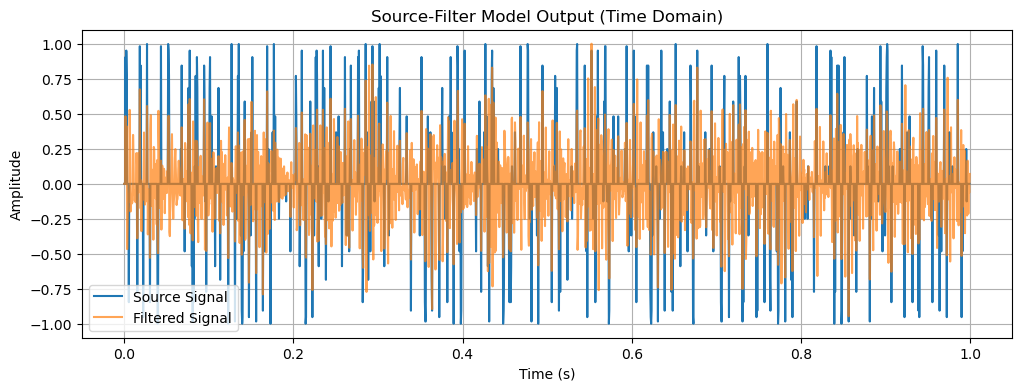

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(t[:2000], source_signal[:2000], label="Source Signal")
plt.plot(t[:2000], filtered_signal[:2000], label="Filtered Signal", alpha=0.7)
plt.title("Source-Filter Model Output (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

The source signal was rich in harmonics, but after filtering, certain frequencies are amplified, while other are attenuated. Specifically, the frequencies corresponding to the formants are peaking.

#### (c) Sample the speech signal generated in the above task at different sampling rates (e.g., 200Hz, 1000Hz, 2000 Hz).

#### (d) Reconstruct the signal using a suitable interpolation method.

#### (e) Compute the MSE between the original and reconstructed speech signals.

In [25]:
sampling_rates = [200, 1000, 2000]
sampled_signals = []
sample_times = []

for rate in sampling_rates:
    step = int(fs / rate)
    sampled = filtered_signal[::step]
    sampled_signals.append(sampled)
    sample_times.append(np.arange(len(sampled)) / rate)


Sampling Rate 200 Hz:
  Linear Interpolation MSE: 0.096063
  Zero-Order Hold MSE: 0.096063


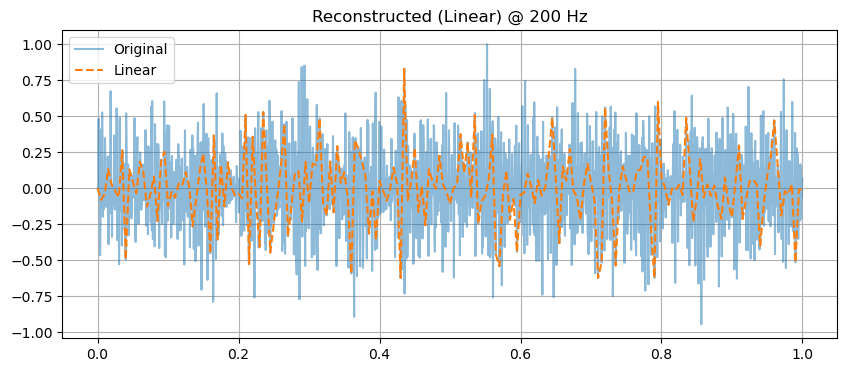

Playing Linear Reconstruction:



Sampling Rate 1000 Hz:
  Linear Interpolation MSE: 0.039127
  Zero-Order Hold MSE: 0.039127


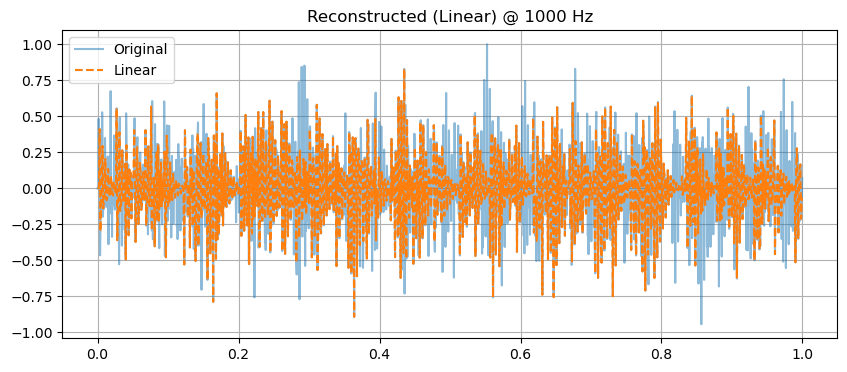

Playing Linear Reconstruction:



Sampling Rate 2000 Hz:
  Linear Interpolation MSE: 0.000000
  Zero-Order Hold MSE: 0.000000


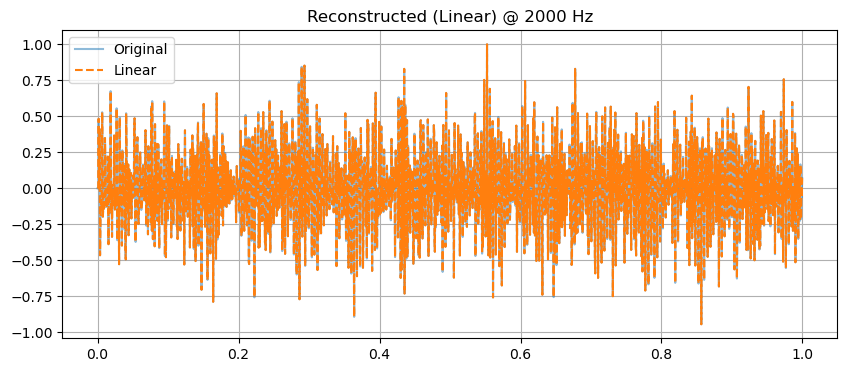

Playing Linear Reconstruction:


In [26]:
def reconstruct(t_samples, samples, t_full, method):
    kind = 'nearest' if method == 'zero' else 'linear'
    f = np.interp(t_full, t_samples, samples) if kind == 'linear' else np.interp(t_full, t_samples, samples, right=None)
    return f

for rate, samples, t_s in zip(sampling_rates, sampled_signals, sample_times):
    t_full = np.arange(len(filtered_signal)) / fs
    rec_linear = reconstruct(t_s, samples, t_full, 'linear')
    rec_zero = reconstruct(t_s, samples, t_full, 'zero')

    mse_linear = mean_squared_error(filtered_signal, rec_linear)
    mse_zero = mean_squared_error(filtered_signal, rec_zero)

    print(f"\nSampling Rate {rate} Hz:")
    print(f"  Linear Interpolation MSE: {mse_linear:.6f}")
    print(f"  Zero-Order Hold MSE: {mse_zero:.6f}")

    plt.figure(figsize=(10, 4))
    plt.plot(t_full[:2000], filtered_signal[:2000], label='Original', alpha=0.5)
    plt.plot(t_full[:2000], rec_linear[:2000], '--', label='Linear')
    plt.title(f"Reconstructed (Linear) @ {rate} Hz")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Playing Linear Reconstruction:")
    display(Audio(rec_linear, rate=fs))

##Inference

1. **Source-Filter Model**  
   - The source generates either periodic impulses (voiced sounds) or noise (unvoiced sounds).  
   - The vocal tract filter shapes this into realistic speech-like sounds by introducing formants.  

2. **Effect of Filtering**  
   - Without filtering, the source is unnatural (impulses/noise).  
   - Filtering introduces resonances (formants), giving speech its characteristic quality.  

3. **Sampling Rates**  
   - At **200Hz**, quality drops with noticeable distortion but speech remains intelligible.  
   - At **1000Hz**, good balance of clarity and efficiency.  
   - At **2000Hz**, closest to the original with minimal error.  

4. **Reconstruction Methods**  
   - **Zero-order hold** produces blocky, unnatural signals.  
   - **Linear interpolation** is smoother and has lower MSE.  

5. **Conclusion**  
   - Higher sampling rates and linear interpolation preserve quality.  
   - The experiment validates the Source-Filter theory and demonstrates the trade-off between sampling rate and quality.


Again, the inferences for the sampling rates and reconstruction remain the same. However, we saw something new with the source filter model where applying a filter that models vocal tract can shape the signal in a certain fashion. This is exactly how we speak i.e., first the raw speech is generated which is later filtered by our vocal cords to increase certain frequencies resulting in formation of meaningful words and sounds.